In [1]:
import numpy as np
from scipy.linalg import expm #This is the automatic matrix expnent solver
from jump_process_generators import *
import matplotlib.pyplot as plt
from NVM_state_space import *
from NVM_state_space_filters import *

In [3]:
beta = 0.1
C = 0.1
T = 1
muw = 0
sigmaw = 1
N = 100 #Resolution
normal_gamma_generator = normal_gamma_process(beta,C,T,muw,sigmaw)
normal_gamma_samples,jumps,jump_times = normal_gamma_generator.generate_gamma_samples(np.linspace(0,T,N),raw_data=True)
print(np.shape(jumps))

(11,)


In [4]:
#Simulation Parameters
theta = -2 #The main control parameter for the Lagevin system
beta = 5
C = 1
T = 0.001
muw = 0
sigmaw = 1
N = 100  # Resolution

#Define the Langevin dynamics
A = np.zeros((2, 2))
A[0, 1] = 1
A[1, 1] = theta
h = np.array([[0], [1]])

#Simulation
evaluation_points = np.linspace(0, T, N) #Note that this would be the time axis we work on.
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
jump_number = 0
for i in range(1000):
    #We need the NVM_jumps and jump_times as the exact proposal
    #SDE_samples,system_jumps,NVM_jumps,subordinator_jumps,jump_times = langevin.generate_samples(evaluation_points,all_data=True)
    paths,subordinator_jumps,jump_times = normal_gamma_generator.generate_gamma_samples(evaluation_points,raw_data=True)
    jump_number += len(jump_times)
print(jump_number)

theta = -2 #The main control parameter for the Lagevin system
beta = 5
C = 1
T = 1
muw = 0
sigmaw = 1
N = 10  # Resolution

#Define the Langevin dynamics
A = np.zeros((2, 2))
A[0, 1] = 1
A[1, 1] = theta
h = np.array([[0], [1]])

#Simulation
evaluation_points = np.linspace(0, T, N) #Note that this would be the time axis we work on.
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
paths,subordinator_jumps,jump_times = normal_gamma_generator.generate_gamma_samples(evaluation_points,raw_data=True)
print(np.shape(subordinator_jumps))


8
(9,)


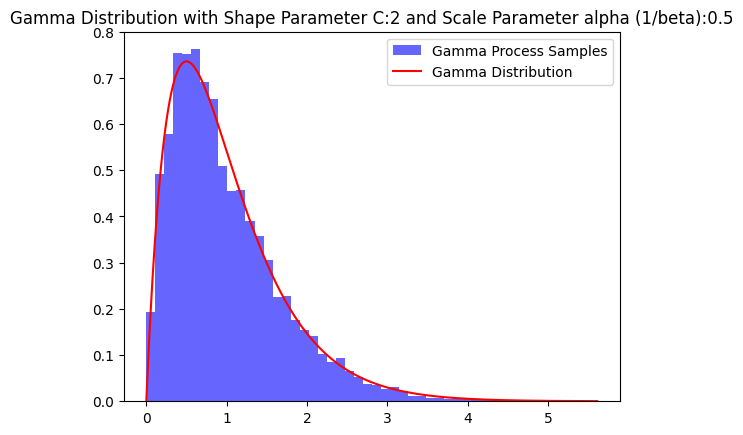

In [5]:
from scipy.stats import gamma
N = 10000 #The number of samples in the histogram
T = 10 #The simulation time
beta = 2 #This is the inverse scale parameter
alpha = 1/beta #The scale parameter for generation
C = 2  #This is the rate/shape parameter
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
samples = []
for i in range(N):
    sample = normal_gamma_generator.generate_gamma_samples([1])
    samples.append(sample[0])

plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', label="Gamma Process Samples")
# Generate x values
x = np.linspace(min(samples), max(samples), N)
# Plotting gamma distribution
plt.plot(x, gamma.pdf(x, C, scale=alpha), 'r', label="Gamma Distribution")
plt.title("Gamma Distribution with Shape Parameter C:{} and Scale Parameter alpha (1/beta):{}".format(C,alpha))
plt.legend()
plt.show()


## We have a perfect matching generator now

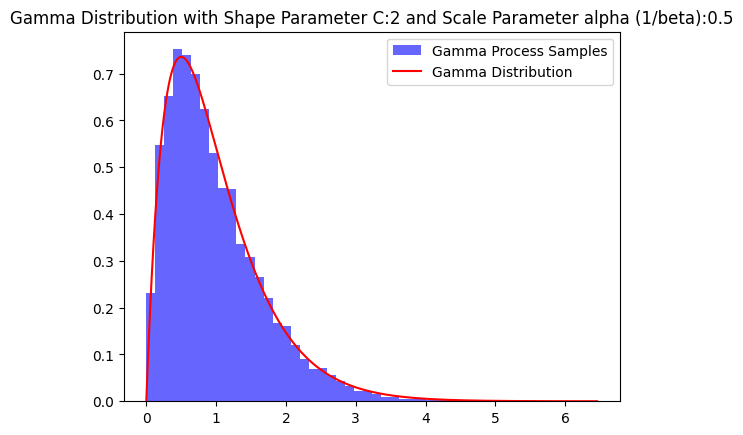

(array([0.00157182, 0.00432252, 0.01178868, 0.01768302, 0.04126038,
        0.06916026, 0.09273762, 0.12888958, 0.16504153, 0.19019071,
        0.2448116 , 0.22791449, 0.24874116, 0.25895802, 0.2510989 ,
        0.25699324, 0.24245387, 0.21298216, 0.19058367, 0.18233159,
        0.14853738, 0.12731775, 0.11788681, 0.09391649, 0.08252076,
        0.07348278, 0.04990541, 0.03654491, 0.03340126, 0.02711397,
        0.02043371, 0.01925485, 0.01571824, 0.01218164, 0.0098239 ,
        0.00746616, 0.00432252, 0.00235774, 0.00235774, 0.00196478,
        0.00078591, 0.00039296, 0.        , 0.00078591, 0.        ,
        0.        , 0.        , 0.        , 0.00078591, 0.00078591]),
 array([ 0.98308014,  1.23756155,  1.49204295,  1.74652435,  2.00100576,
         2.25548716,  2.50996856,  2.76444997,  3.01893137,  3.27341277,
         3.52789418,  3.78237558,  4.03685698,  4.29133839,  4.54581979,
         4.80030119,  5.0547826 ,  5.309264  ,  5.5637454 ,  5.81822681,
         6.07270821,  6.32

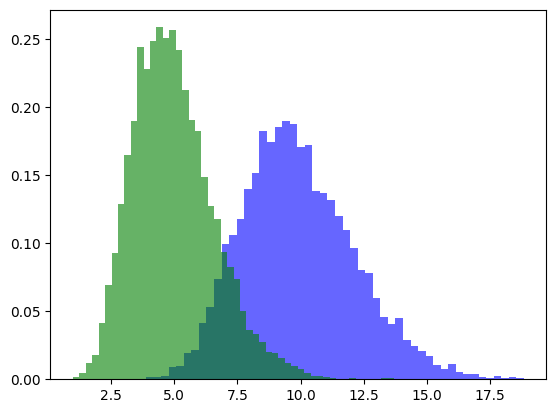

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define parameters
N = 10000
T = 10
beta = 2
alpha = 1/beta
C = 2

# Placeholder values for muw and sigmaw
muw = 0  # Define appropriately
sigmaw = 1  # Define appropriately

# Initialize generator
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)

# Generate samples
samples = [normal_gamma_generator.generate_gamma_samples([1])[0] for _ in range(N)]

# Plot histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', label="Gamma Process Samples")

# Generate x values for theoretical distribution
x = np.linspace(min(samples), max(samples), 1000)

# Plot theoretical Gamma distribution
plt.plot(x, gamma.pdf(x, C, scale=alpha), 'r', label="Gamma Distribution")

# Add title and legend
plt.title("Gamma Distribution with Shape Parameter C:{} and Scale Parameter alpha (1/beta):{}".format(C, alpha))
plt.legend()
plt.show()

# ... [previous code] ...

# Collect samples at time T and an intermediate time point
samples_at_T = [normal_gamma_generator.generate_gamma_samples([T])[0] for _ in range(N)]
samples_at_intermediate = [normal_gamma_generator.generate_gamma_samples([T/2])[0] for _ in range(N)]

# Plot histogram of samples at time T
plt.hist(samples_at_T, bins=50, density=True, alpha=0.6, color='b', label="Gamma Process Samples at T")
plt.hist(samples_at_intermediate, bins=50, density=True, alpha=0.6, color='g', label="Gamma Process Samples at T/2")

# ... [plotting code for theoretical distribution and showing the plot] ...


## Further Checking with all previous implementations

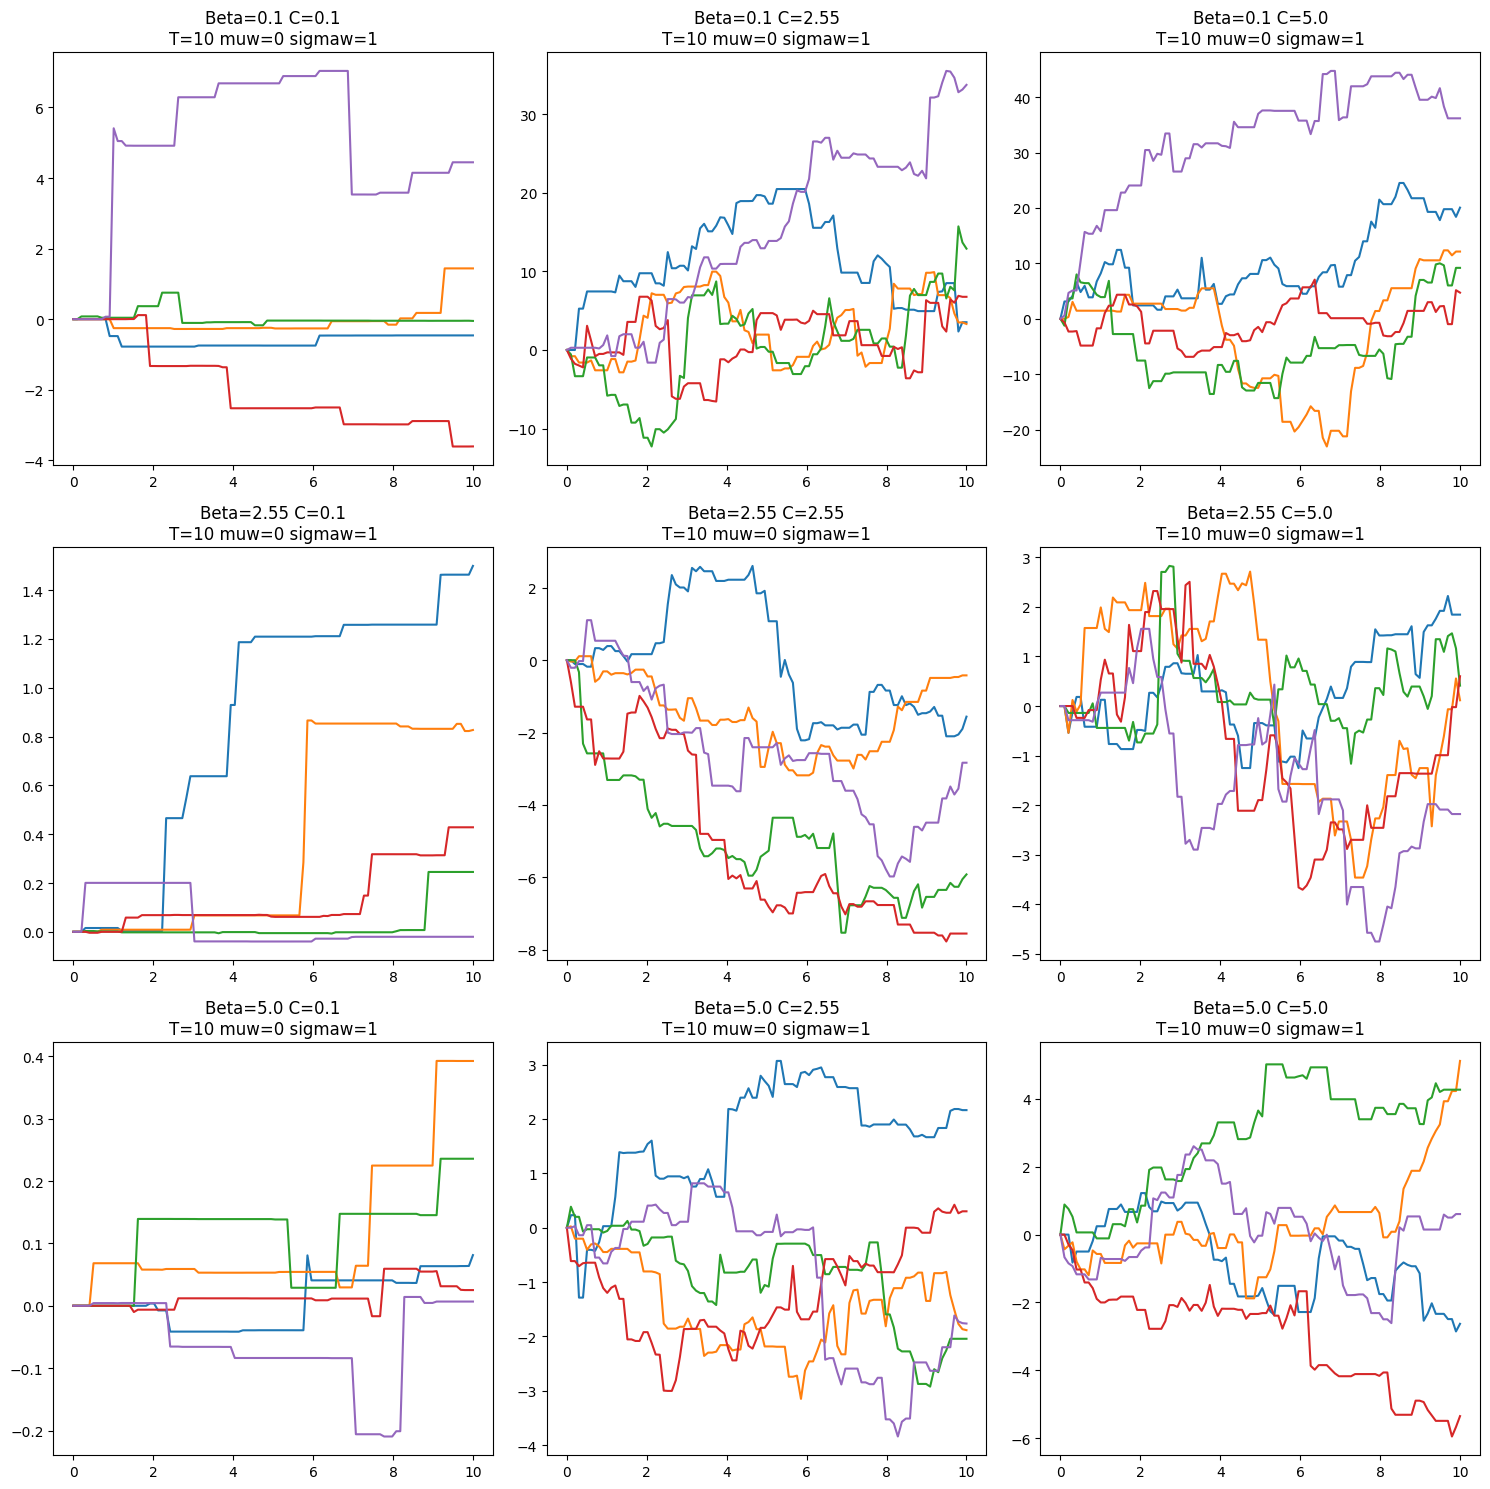

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Your normal_gamma_process function and other necessary functions should be defined or imported here

# List of parameters to loop over. Adjust as needed.
betas = np.linspace(0.1,5,3)
Cs = np.linspace(0.1,5,3)
T = 1
muws = np.linspace(0.1,2,3)
sigmaws = np.linspace(0.1,2,3)
N = 100 #Resolution, the number of points to be evaluated in the process
M = 5 #The number of paths to be included on the same graph

# Create a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, beta in enumerate(betas):
    for j, C in enumerate(Cs):
        # Set other parameters (or loop over them in additional loops if you want)
        T = 10
        muw = 0
        sigmaw = 1
        for k in range(M):
            normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
            normal_gamma_samples = normal_gamma_generator.generate_samples(np.linspace(0,T,N))
        
            axes[i, j].plot(np.linspace(0, T, N), normal_gamma_samples)
        axes[i, j].set_title("Beta={} C={}\nT={} muw={} sigmaw={}".format(round(beta,3), round(C,3), round(T,3), round(muw,3), round(sigmaw,3)))

# Adjust spacing
plt.tight_layout()
plt.show()
plt.savefig("Normal_Gamma_Parameters_1.png")

plt.show()

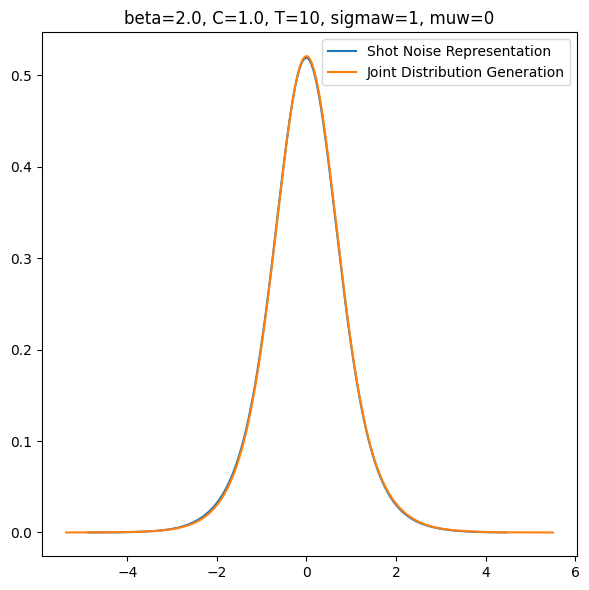

In [3]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Assuming normal_gamma_process and generate_normal_gamma_samples_from_joint functions are defined

# Set specific parameters
beta = 2.0  # Example value
C = 1.0     # Example value
T = 10
muw = 0
sigmaw = 1
M = 10000  # The number of samples

fig, ax = plt.subplots(figsize=(6, 6))

# Generate samples using the chosen parameters
process = normal_gamma_process(beta, C, T, muw, sigmaw)
samples = [process.generate_samples(np.array([1]))[0] for _ in range(M)]
samples = np.array(samples)

# Define and fit KDE model
samples_kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(samples[:, np.newaxis])
sample_range = np.linspace(min(samples) - 1, max(samples) + 1, len(samples))
sample_log_density = samples_kde.score_samples(sample_range[:, np.newaxis])

# Plot KDE
ax.plot(sample_range, np.exp(sample_log_density), label="Shot Noise Representation")

# Generate joint distribution samples
joint_samples = [process.generate_normal_gamma_samples_from_joint(np.array([1]))[0] for _ in range(M)]
joint_samples = np.array(joint_samples)

# Define and fit KDE for joint samples
joint_kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(joint_samples[:, np.newaxis])
joint_sample_range = np.linspace(min(joint_samples) - 1, max(joint_samples) + 1, len(joint_samples))
joint_sample_log_density = joint_kde.score_samples(joint_sample_range[:, np.newaxis])

# Plot KDE for joint samples
ax.plot(joint_sample_range, np.exp(joint_sample_log_density), label="Joint Distribution Generation")

# Set plot title with parameters
ax.set_title(f"beta={beta}, C={C}, T={T}, sigmaw={sigmaw}, muw={muw}")
ax.legend()

plt.tight_layout()
plt.savefig("Normal_Gamma_Validity_Check1.png")
plt.show()


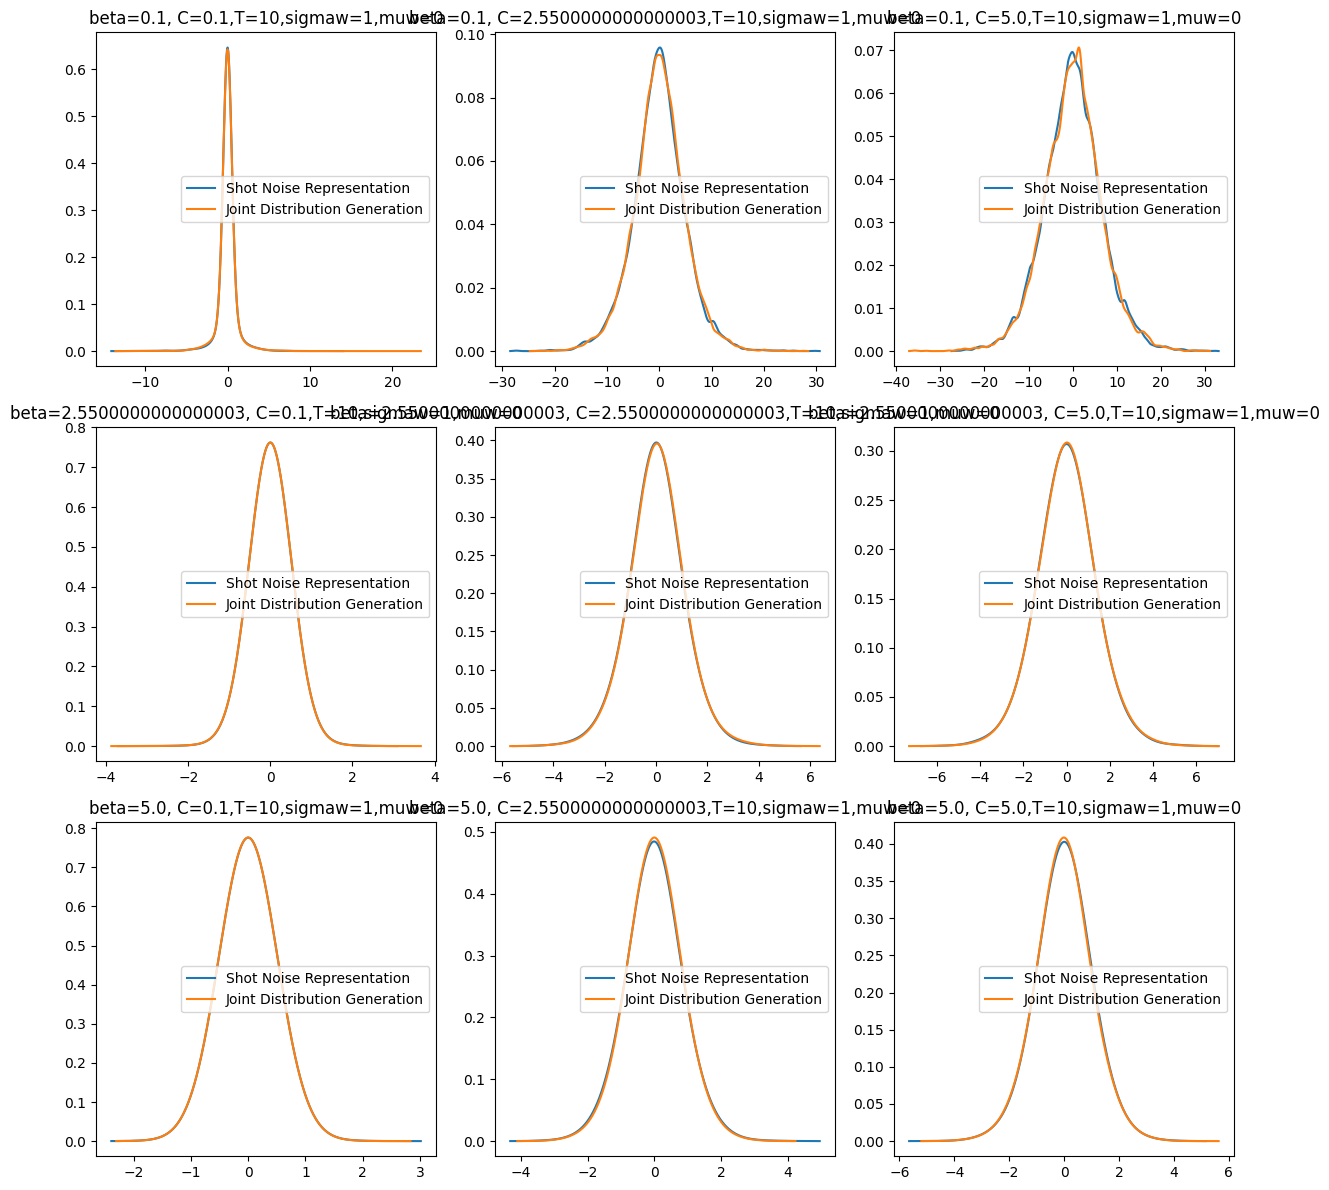

In [2]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Assuming normal_gamma_process and generate_normal_gamma_samples_from_joint functions are defined

betas = np.linspace(0.1, 5, 3)
Cs = np.linspace(0.1, 5, 3)

T = 10
muw = 0
sigmaw = 1
N = 100  # Resolution, the number of points to be evaluated in the process
M = 10000  # The number of samples

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(len(betas)):
    for j in range(len(Cs)):
        C = Cs[j]
        beta = betas[i]
        process = normal_gamma_process(beta, C, T, muw, sigmaw)
        samples = []
        for k in range(M):
            sample = process.generate_samples(np.array([1]))
            samples.append(sample[0])
        samples = np.array(samples)

        samples_kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(samples[:, np.newaxis])
        sample_range = np.linspace(min(samples) - 1, max(samples) + 1, len(samples))
        sample_log_density = samples_kde.score_samples(sample_range[:, np.newaxis])
        axes[i, j].plot(sample_range, np.exp(sample_log_density), label="Shot Noise Representation")

        joint_samples = []
        for k in range(M):
            joint_sample = process.generate_normal_gamma_samples_from_joint(np.array([1]))
            joint_samples.append(joint_sample[0])
        joint_samples = np.array(joint_samples)

        joint_kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(joint_samples[:, np.newaxis])
        joint_sample_range = np.linspace(min(joint_samples) - 1, max(joint_samples) + 1, len(joint_samples))
        joint_sample_log_density = joint_kde.score_samples(joint_sample_range[:, np.newaxis])
        axes[i, j].plot(joint_sample_range, np.exp(joint_sample_log_density), label="Joint Distribution Generation")

        # Set plot title with parameters
        axes[i, j].set_title(f"beta={beta}, C={C},T={T},sigmaw={sigmaw},muw={muw}")
        axes[i, j].legend()

plt.tight_layout()
plt.savefig("Normal_Gamma_Validity_Check1.png")
plt.show()


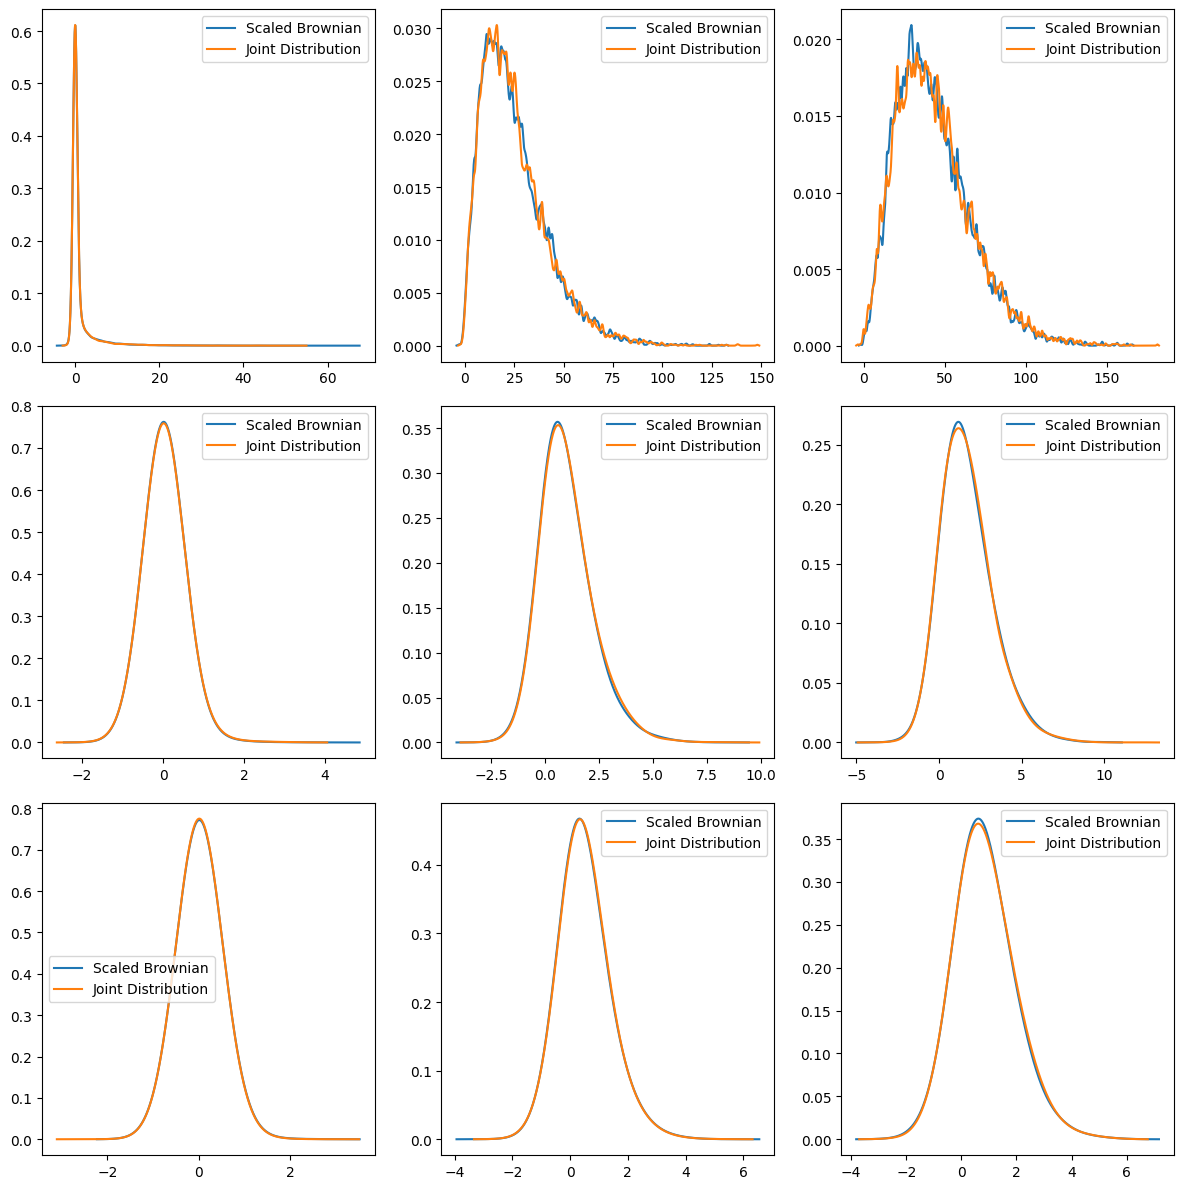

In [1]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.linalg import expm #This is the automatic matrix expnent solver
from jump_process_generators import *
from NVM_state_space import *
from NVM_state_space_filters import *
betas = np.linspace(0.1,5,3)
Cs = np.linspace(0.1,5,3)

T = 10
muws = np.linspace(0.1,2,3)
sigmaws = np.linspace(0.1,2,3)
muw = 1
sigmaw=1
N = 100 #Resolution, the number of points to be evaluated in the process
M = 10000 #The number of samples

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(len(betas)):
    for j in range(len(Cs)):
        C = Cs[j]
        beta = betas[i]
        process = normal_gamma_process(beta,C,T,muw,sigmaw) 
        samples = []
        for k in range(M):  
            sample = process.generate_samples(np.array([1])) #Put in a single point to evaluate at an exact point here.
            samples.append(sample[0])
        samples = np.array(samples)
        #samples = samples[:, np.newaxis]
        # Define the KDE model
        samples_kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(samples[:, np.newaxis])
        # Create a range of values for which we want to estimate the density
        sample_range = np.linspace(min(samples) - 1, max(samples) + 1, len(samples))

        # Evaluate the model on the data
        sample_log_density = samples_kde.score_samples(sample_range[:, np.newaxis])

        # Plot the KDE
        axes[i,j].plot(sample_range, np.exp(sample_log_density), label="Scaled Brownian")
        

        joint_samples = []
        for k in range(M):  
            joint_sample = process.generate_normal_gamma_samples_from_joint(np.array([1]),N) #Put in a single point to evaluate at an exact point here.
            joint_samples.append(joint_sample[0])
        joint_samples = np.array(joint_samples)
        #joint_samples = joint_samples[:, np.newaxis]
        # Define the KDE model
        joint_kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(joint_samples[:, np.newaxis])
        # Create a range of values for which we want to estimate the density
        joint_sample_range = np.linspace(min(joint_samples) - 1, max(joint_samples) + 1, len(joint_samples))

        # Evaluate the model on the data
        joint_sample_log_density = joint_kde.score_samples(joint_sample_range[:, np.newaxis])

        # Plot the KDE
        axes[i,j].plot(joint_sample_range, np.exp(joint_sample_log_density), label="Joint Distribution")

        axes[i, j].legend()
        
        
        

plt.tight_layout()
plt.savefig("Normal_Gamma_Validity_Check1.png")
plt.show()


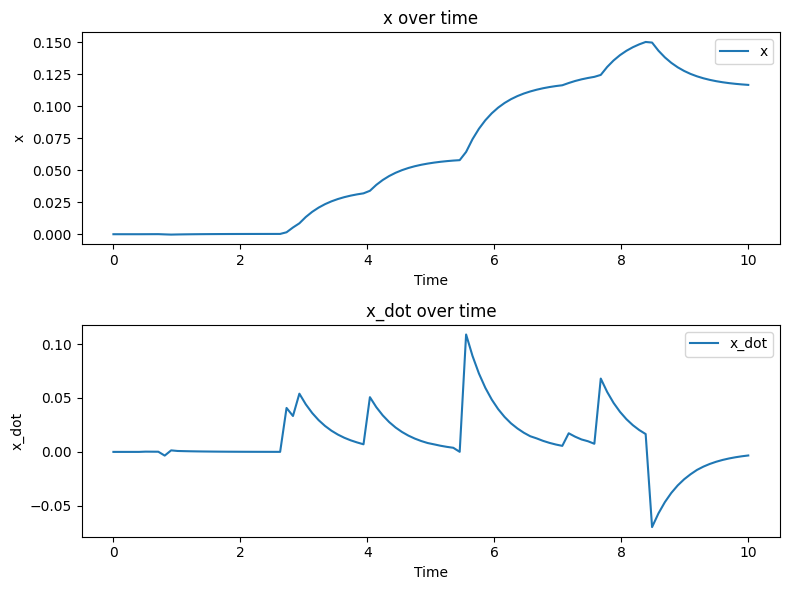

In [8]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.linalg import expm #This is the automatic matrix expnent solver
from jump_process_generators import *
from NVM_state_space import *
from NVM_state_space_filters import *

theta = -2 #This corresponds to the original A in the 1D example
A = np.zeros((2,2))
A[0,1] = 1
A[1,1] = theta
h = np.zeros((2,1))
h[1] = 1
#print(A)
#print(h)
M = 1 #The number of repetition

beta = 5
C = 0.1
T = 10
muw = 0
sigmaw = 1
N = 100 #Resolution

normal_gamma_generator = normal_gamma_process(beta,C,T,muw,sigmaw)
evaluation_points = np.linspace(0,T,N)
langevin = SDE(A,h,T,normal_gamma_generator)
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
for i in range(M):
    SDE_samples = langevin.generate_samples(evaluation_points)
    
    x = SDE_samples[:,0]
    x_dot = SDE_samples[:,1]


    # Plot x
    axs[0].plot(evaluation_points, x, label='x')
    axs[0].set_title('x over time')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('x')
    axs[0].legend()

    # Plot x_dot
    axs[1].plot(evaluation_points, x_dot, label='x_dot')
    axs[1].set_title('x_dot over time')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('x_dot')
    axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

## The following is the most correct form for Kalman filtering

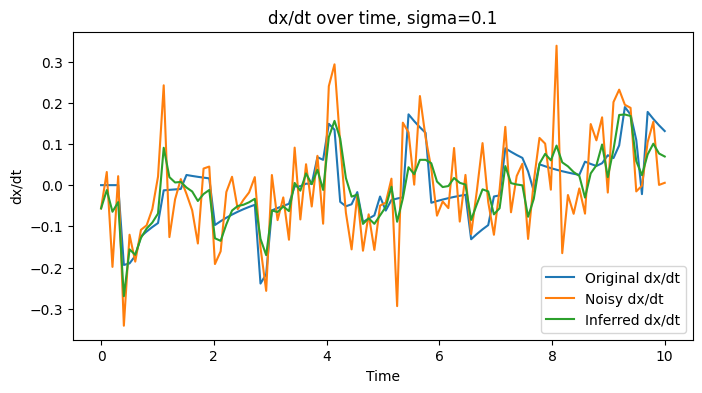

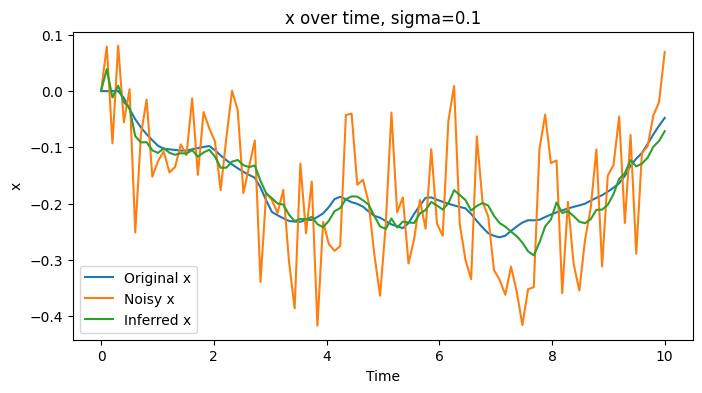

0.00155


In [21]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.linalg import expm #This is the automatic matrix expnent solver
from jump_process_generators import *
from NVM_state_space import *
from NVM_state_space_filters import *
from basic_tools import *
#Performances basically increase with SNR

#Note that this is the only source of information masking
sigma_n = 0.1#The observation noise std. Note that only this term affects the noise level, not sigma_w


#Simulation Parameters
theta = -1 #The main control parameter for the Lagevin system
beta = 1
C = 10
T = 10
muw = 0
sigmaw = 0.1
N = 100  # Resolution

#Define the Langevin dynamics
A = np.zeros((2, 2))
A[0, 1] = 1
A[1, 1] = theta
h = np.array([[0], [1]])

#Simulation
evaluation_points = np.linspace(0, T, N)
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
langevin = SDE(A,h,T,normal_gamma_generator)
#We need the NVM_jumps and jump_times as the exact proposal
SDE_samples,system_jumps,NVM_jumps,subordinator_jumps,jump_times = langevin.generate_samples(evaluation_points,all_data=True)
d1,d2 = np.shape(SDE_samples)
Noisy_samples = SDE_samples + np.random.randn(d1,d2)*sigma_n



################################################################################################################################################
#From here we can pack the code into a Kalman filtering function
#Then we perform Kalman filtering with exact proposal for system parameters, driving process jumps and jump times
#Note that the driving process jumps are the NVM jumps

#Here we define the default prior covariance matrix for Kalman filteirng. No need for prior mean? Use the first sample directly
X0 = Noisy_samples[0]
nx0 = np.shape(X0)[0] 
P0 = np.identity(nx0)

delta_t = evaluation_points[1] - evaluation_points[0]
f = expm(A * delta_t)#The same transition matrix throughout in our example
g = np.identity(nx0) #Direct observation throughout
R = np.identity(nx0) * sigma_n**2 #Same observation noise throughout
first_time = True
inferred_Xs = []
inferred_covs = []
for t,evaluation_point in enumerate(evaluation_points):
    observation = Noisy_samples[t]
    observation = np.array(observation).reshape(nx0,1) 
    #Kalman Prediction Step
    if first_time:
        first_time = False
        s=0
        inferred_X=np.array(X0).reshape(nx0,1)
        inferred_cov=P0
    else:
        inferred_X = inferred_Xs[-1]
        inferred_cov = inferred_covs[-1]
        noise_mean = 0
        noise_cov = 0
        for i,jump_time in enumerate(jump_times):
            gamma_jump = subordinator_jumps[i]
            if s<=jump_time<=evaluation_point:
                state_transition_matrix_product = expm(A*(evaluation_point - jump_time)) @ h
                noise_mean_component = muw * gamma_jump *state_transition_matrix_product
                noise_std_component = sigmaw * np.sqrt(np.abs(gamma_jump)) * state_transition_matrix_product
                noise_mean += noise_mean_component
                noise_cov += noise_std_component @ noise_std_component.T
        inferred_X,inferred_cov = Kalman_transit(inferred_X,inferred_cov,f,noise_cov,mw = noise_mean)
        inferred_X = inferred_X.reshape(nx0,1)
    #print(inferred_X)
    #print(np.shape(inferred_X))
    #Kalman Correction Step
    inferred_X,inferred_cov = Kalman_correct(inferred_X,inferred_cov,observation,g,R)
    inferred_Xs.append(inferred_X)
    inferred_covs.append(inferred_cov)
    s = evaluation_point #Do not forget the update in s.

inferred_Xs = np.squeeze(inferred_Xs, axis=-1)   
#These are the returns
##########################################################################################################################################

        
plt.figure(figsize=(8, 4))
plt.plot(evaluation_points, SDE_samples[:,1], label='Original dx/dt')
plt.plot(evaluation_points, Noisy_samples[:,1], label='Noisy dx/dt')
plt.plot(evaluation_points, inferred_Xs[:,1], label='Inferred dx/dt')
plt.title(f'dx/dt over time, sigma={sigma_n}')
plt.xlabel('Time')
plt.ylabel('dx/dt')
plt.legend()
plt.show()

# Plot for x
plt.figure(figsize=(8, 4))
plt.plot(evaluation_points, SDE_samples[:,0], label='Original x')
plt.plot(evaluation_points, Noisy_samples[:,0], label='Noisy x')
plt.plot(evaluation_points, inferred_Xs[:,0], label='Inferred x')
plt.title(f'x over time, sigma={sigma_n}')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.show()
#x_dot = SDE_samples[:,1]
print(calculate_mse(inferred_Xs,SDE_samples))





## Particle Filtering in NVM State Space Model

#### In the basic bootstrap particle filter, we need no additional transition kernel. We need only the transition function for particle propagation and emission function for computing the observation probability of each particle to determine the unnomorlized weights.

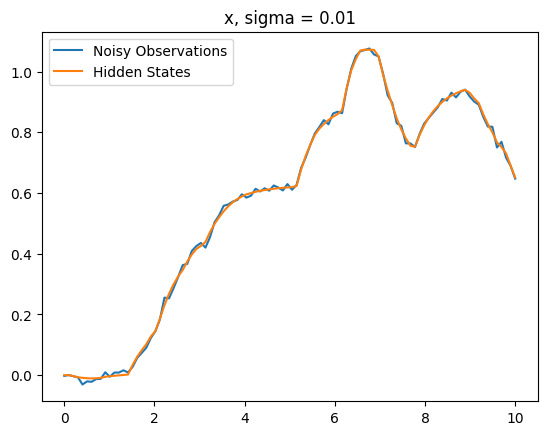

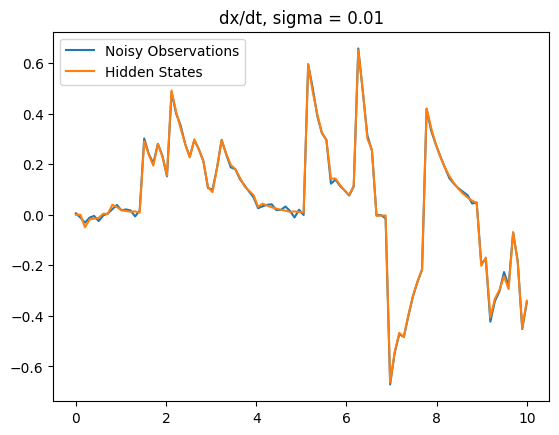

In [18]:
#Again, we first generate the noisy observations.
#We again have the noisy data first:
sigma_n = 0.01#The observation noise std. Note that only this term affects the noise level, not sigma_w


#Simulation Parameters
theta = -2 #The main control parameter for the Lagevin system
beta = 5
C = 1
T = 10
muw = 0
sigmaw = 1
N = 100  # Resolution

#Define the Langevin dynamics
A = np.zeros((2, 2))
A[0, 1] = 1
A[1, 1] = theta
h = np.array([[0], [1]])

#Simulation
evaluation_points = np.linspace(0, T, N) #Note that this would be the time axis we work on.
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
langevin = SDE(A,h,T,normal_gamma_generator)
#We need the NVM_jumps and jump_times as the exact proposal
SDE_samples,system_jumps,NVM_jumps,subordinator_jumps,jump_times = langevin.generate_samples(evaluation_points,all_data=True)
d1,d2 = np.shape(SDE_samples)
Noisy_samples = SDE_samples + np.random.randn(d1,d2)*sigma_n


plt.plot(evaluation_points,Noisy_samples[:,0],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,0],label = "Hidden States")
plt.title("x, sigma = {}".format(sigma_n))
plt.legend()
plt.show()

plt.plot(evaluation_points,Noisy_samples[:,1],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,1],label = "Hidden States")
plt.title("dx/dt, sigma = {}".format(sigma_n))
plt.legend()
plt.show()

In [5]:
theta = -2 #The main control parameter for the Lagevin system
beta = 5
C = 0.1
T = 10
muw = 0
sigmaw = 1
#Define the Langevin dynamics
A = np.zeros((2, 2))
A[0, 1] = 1
A[1, 1] = theta
h = np.array([[0], [1]])

#Simulation
evaluation_points = np.array([0,1]) #Note that this would be the time axis we work on.
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
ng_paths,ng_jumps,jump_times = normal_gamma_generator.generate_gamma_samples(evaluation_points,raw_data = True)



#Then we solve for the summation
system_jumps = []
for j,jump_time in enumerate(jump_times):
    ng_jump = ng_jumps[j]
    system_jump = ng_jump * expm(A * (1-jump_time)) @ h
    system_jumps.append(list(system_jump))
results = []



# Use the mask to select data from x_series and sum along the time axis (axis=0)
sum_over_time = np.sum(system_jumps, axis=0)

In [6]:
print(np.shape(np.squeeze(ng_jumps))) #np.squeeze function is designed specifically for removing the redundant dimension in the data. In this case it converts the (N,2,1) array into (N,2) array.
print(np.shape(jump_times))
print(np.shape(sum_over_time))
print(np.shape(Noisy_samples))
print(np.shape(Noisy_samples[10]))

(98,)
(98,)
(2, 1)
(100, 2)
(2,)


#### Below is a complete implementation of particle filter. Transition function is the proposal (important details)

In [18]:
import numpy as np
from scipy.linalg import expm #This is the automatic matrix expnent solver
from jump_process_generators import *
import matplotlib.pyplot as plt
from NVM_state_space import *
from NVM_state_space_filters import *
#We the try to filter from the noisy observations using particle filtering. Define the transition function and likelihood function to do that
#The generator for particle filter!
def transition_function_exact_case(particles,dt,matrix_exp): #dt is the length of forwards simulation. t is the evaluation point
    new_particles = []
    #We assume first that we know the exact generator for the process
    theta = -2 #The main control parameter for the Lagevin system
    beta = 5
    C = 0.1
    T = dt
    muw = 0
    sigmaw = 1
    #Define the Langevin dynamics
    A = np.zeros((2, 2))
    A[0, 1] = 1
    A[1, 1] = theta
    h = np.array([[0], [1]])

    #Simulation over dt interval to obtain the jumps and jump times
    evaluation_points = [dt] #Note that this would be the time axis we work on.
    normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
    for particle in particles:
        ng_paths,ng_jumps,jump_times = normal_gamma_generator.generate_samples(evaluation_points,raw_data = True)
        #The jumpss and time already before dt
        

        #Then we solve for the summation
        system_jumps = []
        if len(jump_times)>1:
            for ng_jump,jump_time in zip(ng_jumps,jump_times):
                system_jump = ng_jump * expm(-A * jump_time) @ h
                system_jumps.append(system_jump)
            # Use the mask to select data from x_series and sum along the time axis (axis=0)
            sum_over_time = np.sum(system_jumps, axis=0)
            sum_over_time = np.squeeze(sum_over_time)
        elif len(jump_times) == 1:
            system_jump = ng_jumps * expm(-A * jump_times) @ h
            system_jumps.append(system_jump)
            sum_over_time = np.sum(system_jumps, axis=0)
            sum_over_time = np.squeeze(sum_over_time)
        else:
    # Initialize sum_over_time as a zero array of the same shape as a particle
            sum_over_time = np.zeros(2)
            sum_over_time = np.squeeze(sum_over_time)
        #print(np.shape(sum_over_time))
        #print(np.shape( matrix_exp@particle))
        new_particles.append(sum_over_time + matrix_exp@particle)
    return np.squeeze(np.array(new_particles))


def likelihood_function(particles, observation, sigma):
    likelihoods = []
    for particle in particles:
        l2 =np.sum((particle-observation)**2)
        likelihood = np.exp(-l2/sigma**2/2)
        likelihoods.append(likelihood)
    return np.squeeze(np.array(likelihoods))

def bootstrap_particle_filtering(observation, particles, weights, transition_function, likelihood_function, matrix_exp, dt, sigma):
    num_particles = len(particles)

    # Transition step: move each particle according to the transition model
    particles = transition_function(particles, dt, matrix_exp=matrix_exp)

    # Update weights based on observation likelihood
    weights *= likelihood_function(particles, observation, sigma)
    weights /= np.sum(weights)  # Normalization

    # Resampling step: resample particles based on their weights
    indices = np.random.choice(np.arange(num_particles), size=num_particles, p=weights)
    particles = particles[indices]  # The resampled particles

    # Reset weights to 1/N for the resampled particles
    weights = np.full(num_particles, 1.0 / num_particles)

    return particles, weights

def weighted_sum(particles, weights):
    return np.sum(particles * weights[:, np.newaxis], axis=0)


def compute_log_likelihoods(particles, observation, sigma):
    distances_squared = np.sum((particles - observation)**2, axis=1)
    log_likelihoods = -distances_squared / (2 * sigma**2)
    return log_likelihoods

def normalize_log_probabilities(log_probs):
    max_log_prob = np.max(log_probs)
    stabilized_log_probs = log_probs - max_log_prob
    sum_of_exps = np.sum(np.exp(stabilized_log_probs))
    log_normalizer = np.log(sum_of_exps)
    normalized_log_probs = stabilized_log_probs - log_normalizer
    return normalized_log_probs


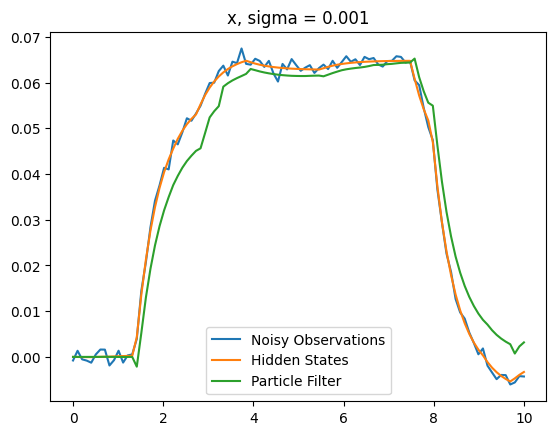

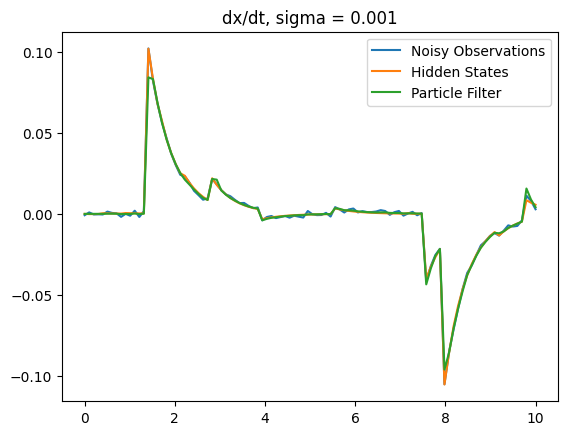

In [4]:
import numpy as np
from scipy.linalg import expm #This is the automatic matrix expnent solver
from jump_process_generators import *
import matplotlib.pyplot as plt
from NVM_state_space import *
from NVM_state_space_filters import *
#We again have the noisy data first:
sigma_n = 0.001#The observation noise std. Note that only this term affects the noise level, not sigma_w


#Simulation Parameters
theta = -2 #The main control parameter for the Lagevin system
beta = 5
C = 0.1
T = 10
muw = 0
sigmaw = 1
N = 100  # Resolution

#Define the Langevin dynamics
A = np.zeros((2, 2))
A[0, 1] = 1
A[1, 1] = theta
h = np.array([[0], [1]])

#Simulation
evaluation_points = np.linspace(0, T, N) #Note that this would be the time axis we work on.
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
langevin = SDE(A,h,T,normal_gamma_generator)
#We need the NVM_jumps and jump_times as the exact proposal
SDE_samples,system_jumps,NVM_jumps,subordinator_jumps,jump_times = langevin.generate_samples(evaluation_points,all_data=True)
d1,d2 = np.shape(SDE_samples)
Noisy_samples = SDE_samples + np.random.randn(d1,d2)*sigma_n




trajectory = []

num_particles = 1000

    
initial_particles = np.zeros((num_particles,2)) # Random initial particles

# Define initial weights (uniform)
initial_weights = np.ones(num_particles) / num_particles


# Time step size and sigma for the likelihood function
dt = evaluation_points[1] - evaluation_points[0]
matrix_exp = expm(A*dt)
sigma = sigma_n

# Running the particle filter
particles = initial_particles
histories = [particles]
weights = initial_weights
for i in range(len(evaluation_points)):
    t = evaluation_points[i]
    observation = Noisy_samples[i]
    particles, weights = bootstrap_particle_filtering(observation, particles, weights,
                                                     transition_function_exact_case,
                                                     likelihood_function,matrix_exp, dt, sigma)
    
    particles = particles.reshape(num_particles,2)
    histories.append(particles)
    trajectory.append(weighted_sum(particles,weights))
trajectory = np.array(trajectory)
    

plt.plot(evaluation_points,Noisy_samples[:,0],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,0],label = "Hidden States")
plt.plot(evaluation_points,trajectory.T[0],label = "Particle Filter")
plt.title("x, sigma = {}".format(sigma_n))
plt.legend()
plt.show()

plt.plot(evaluation_points,Noisy_samples[:,1],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,1],label = "Hidden States")
plt.plot(evaluation_points,trajectory.T[1],label = "Particle Filter")
plt.title("dx/dt, sigma = {}".format(sigma_n))
plt.legend()
plt.show()


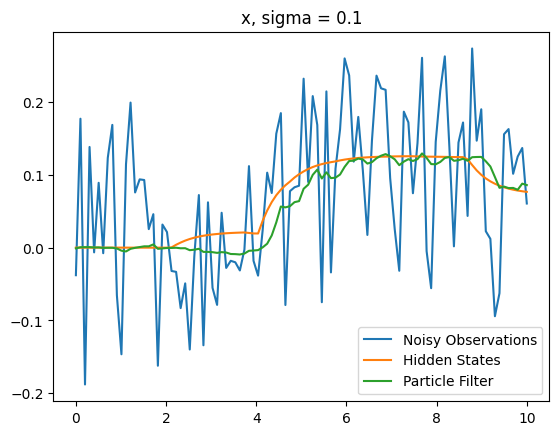

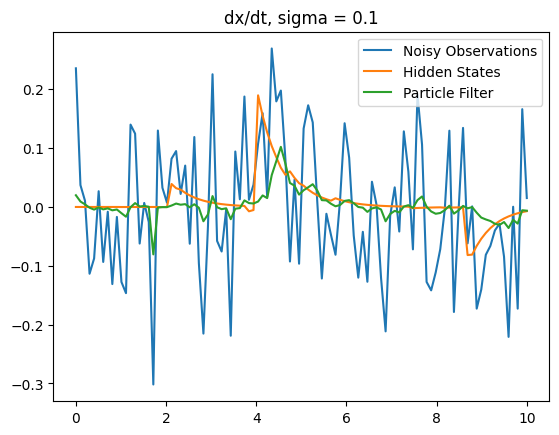

In [85]:

#Again, we first generate the noisy observations.
#We again have the noisy data first:
sigma_n = 0.1#The observation noise std. Note that only this term affects the noise level, not sigma_w


#Simulation Parameters
theta = -2 #The main control parameter for the Lagevin system
beta = 5
C = 0.1
T = 10
muw = 0
sigmaw = 1
N = 100  # Resolution

#Define the Langevin dynamics
A = np.zeros((2, 2))
A[0, 1] = 1
A[1, 1] = theta
h = np.array([[0], [1]])

#Simulation
evaluation_points = np.linspace(0, T, N) #Note that this would be the time axis we work on.
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
langevin = SDE(A,h,T,normal_gamma_generator)
#We need the NVM_jumps and jump_times as the exact proposal
SDE_samples,system_jumps,NVM_jumps,subordinator_jumps,jump_times = langevin.generate_samples(evaluation_points,all_data=True)
d1,d2 = np.shape(SDE_samples)
Noisy_samples = SDE_samples + np.random.randn(d1,d2)*sigma_n




trajectory = []

num_particles = 10000

    
initial_particles = np.zeros((num_particles,2)) # Random initial particles

# Define initial weights (uniform)
initial_weights = np.ones(num_particles) / num_particles


# Time step size and sigma for the likelihood function
dt = evaluation_points[1] - evaluation_points[0]
matrix_exp = expm(A*dt)
sigma = sigma_n

# Running the particle filter
particles = initial_particles
histories = [particles]
weights = initial_weights
for i in range(len(evaluation_points)):
    t = evaluation_points[i]
    observation = Noisy_samples[i]
    particles, weights = bootstrap_particle_filtering(observation, particles, weights,
                                                     transition_function_exact_case,
                                                     likelihood_function,matrix_exp, dt, sigma)
    
    particles = particles.reshape(num_particles,2)
    histories.append(particles)
    trajectory.append(weighted_sum(particles,weights))
trajectory = np.array(trajectory)
    

plt.plot(evaluation_points,Noisy_samples[:,0],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,0],label = "Hidden States")
plt.plot(evaluation_points,trajectory.T[0],label = "Particle Filter")
plt.title("x, sigma = {}".format(sigma_n))
plt.legend()
plt.show()

plt.plot(evaluation_points,Noisy_samples[:,1],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,1],label = "Hidden States")
plt.plot(evaluation_points,trajectory.T[1],label = "Particle Filter")
plt.title("dx/dt, sigma = {}".format(sigma_n))
plt.legend()
plt.show()


In [9]:
print(weights)

[1.10095376e-04 9.73740840e-05 1.07472126e-04 ... 7.99795157e-05
 8.66486458e-05 1.00024778e-04]


## Marginalised Particle Filter
#### Nothing but using the particle filter results for Kalman filtering?

import numpy as np
from scipy.linalg import expm #This is the automatic matrix expnent solver
from jump_process_generators import *
import matplotlib.pyplot as plt
from NVM_state_space import *
from NVM_state_space_filters import *
from scipy.special import logsumexp
#We the try to filter from the noisy observations using particle filtering. Define the transition function and likelihood function to do that
#The generator for particle filter!
def transition_function_mpf(particles,dt,matrix_exp): #dt is the length of forwards simulation. t is the evaluation point
    new_particles = []
    particles_gaussian_parameters = []
    #We assume first that we know the exact generator for the process
    theta = -2 #The main control parameter for the Lagevin system
    beta = 5
    C = 0.1
    T = dt
    muw = 0
    sigmaw = 1
    #Define the Langevin dynamics
    A = np.zeros((2, 2))
    A[0, 1] = 1
    A[1, 1] = theta
    h = np.array([[0], [1]])

    #Simulation over dt interval to obtain the jumps and jump times
    evaluation_points = [dt] #Note that this would be the time axis we work on.
    normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
    for particle in particles:
        ng_paths,ng_jumps,jump_times,g_jumps = normal_gamma_generator.generate_samples(evaluation_points,all_data = True)
        #The jumpss and time already before dt
        

        #Then we solve for the summation
        system_jumps = []
        mean = 0
        cov = 0
        if len(jump_times)>1:
            for ng_jump,jump_time,g_jump in zip(ng_jumps,jump_times,g_jumps):
                special_vector = expm(-A * jump_time) @ h
                mean += muw * g_jump * special_vector
                cov+= sigmaw**2 * g_jump * special_vector @ special_vector.T
                system_jump = ng_jump * special_vector
                system_jumps.append(system_jump)
            # Use the mask to select data from x_series and sum along the time axis (axis=0)
            sum_over_time = np.sum(system_jumps, axis=0)
            sum_over_time = np.squeeze(sum_over_time)
        elif len(jump_times) == 1:
            special_vector = expm(-A * jump_times) @ h
            mean = muw * g_jumps * special_vector
            cov = sigmaw**2 * g_jumps * special_vector @ special_vector.T
            system_jump = ng_jumps * special_vector
            system_jumps.append(system_jump)
            sum_over_time = np.sum(system_jumps, axis=0)
            sum_over_time = np.squeeze(sum_over_time)
        else:
    # Initialize sum_over_time as a zero array of the same shape as a particle
            sum_over_time = np.zeros(2)
            sum_over_time = np.squeeze(sum_over_time)
            mean = np.zeros(2) #No jump so not applicable
            cov = np.zeros((2,2))
        #print(np.shape(sum_over_time))
        #print(np.shape( matrix_exp@particle))
        new_particles.append(sum_over_time + matrix_exp@particle)
        particles_gaussian_parameters.append([mean,cov])
    return np.squeeze(np.array(new_particles)),particles_gaussian_parameters


def likelihood_function(particles, observation, sigma):
    likelihoods = []
    for particle in particles:
        l2 =np.sum((particle-observation)**2)
        likelihood = np.exp(-l2/sigma**2/2)
        likelihoods.append(likelihood)
    return np.squeeze(np.array(likelihoods))

def particle_filtering_mpf(observation, particles, weights, transition_function, likelihood_function, matrix_exp, dt, sigma):
    num_particles = len(particles)

    # Transition step: move each particle according to the transition model
    particles,particles_gaussian_parameters = transition_function(particles, dt, matrix_exp=matrix_exp)

    # Update weights based on observation likelihood
    weights *= likelihood_function(particles, observation, sigma)
    weights /= np.sum(weights)  # Normalization

    # Resampling step: resample particles based on their weights
    indices = np.random.choice(np.arange(num_particles), size=num_particles, p=weights)
    particles = particles[indices]  # The resampled particles

    # Reset weights to 1/N for the resampled particles
    weights = np.full(num_particles, 1.0 / num_particles)

    return particles, weights,particles_gaussian_parameters

def weighted_sum(particles, weights):
    return np.sum(particles * weights[:, np.newaxis], axis=0)


def compute_log_likelihoods(particles, observation, sigma):
    distances_squared = np.sum((particles - observation)**2, axis=1)
    log_likelihoods = -distances_squared / (2 * sigma**2)
    return log_likelihoods

def normalize_log_probabilities(log_probs):
    max_log_prob = np.max(log_probs)
    stabilized_log_probs = log_probs - max_log_prob
    sum_of_exps = np.sum(np.exp(stabilized_log_probs))
    log_normalizer = np.log(sum_of_exps)
    normalized_log_probs = stabilized_log_probs - log_normalizer
    return normalized_log_probs


def compute_inferred_gaussian_parameters(particles_gaussian_parameters, weights):
    """
    Compute the inferred Gaussian parameters (mean and covariance) from the particle parameters.

    :param particles_gaussian_parameters: List of tuples [(m1, S1), (m2, S2), ...] where m is mean and S is covariance
    :param weights: Corresponding weights of the particles
    :return: Tuple (inferred_mean, inferred_covariance)
    """
    weights = weights/np.sum(weights)
    inferred_mean = 0
    inferred_covariance = 0
    for particle_gaussian_parameters,weight in zip(particles_gaussian_parameters,weights):
        m,S = particle_gaussian_parameters
        if np.sum(S) != 0 and m.size>0:
            
            inferred_mean += m * weight
            inferred_covariance += S * weight
        else:
            continue
    return inferred_mean, inferred_covariance

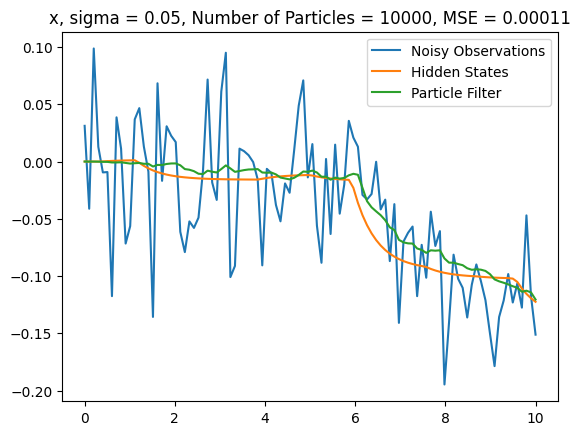

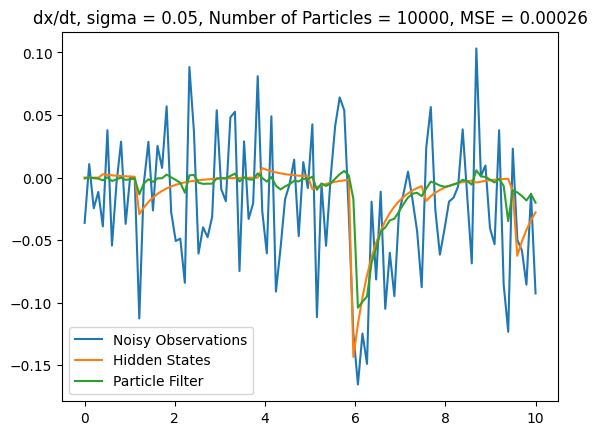

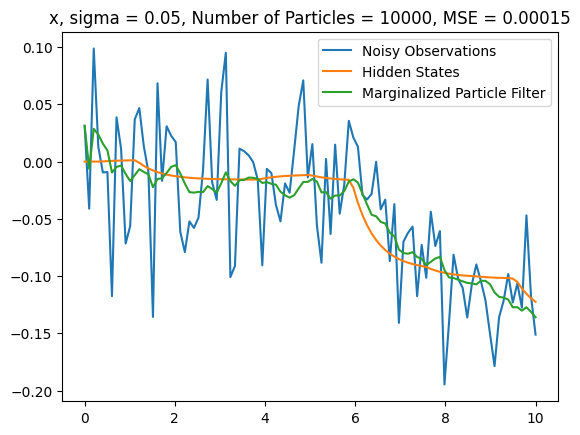

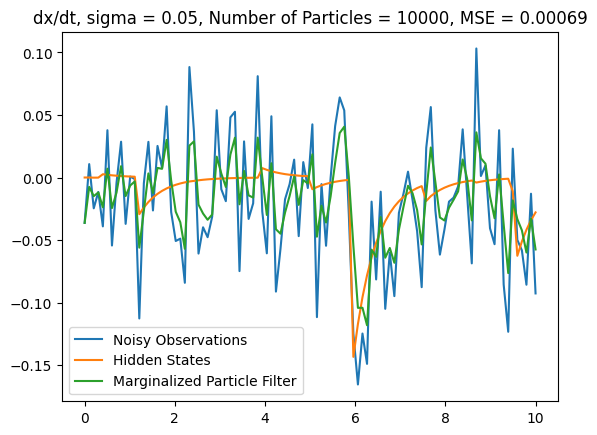

In [23]:
import numpy as np
from scipy.linalg import expm #This is the automatic matrix expnent solver
from jump_process_generators import *
import matplotlib.pyplot as plt
from NVM_state_space import *
from NVM_state_space_filters import *
from basic_tools import *
#Again, we first generate the noisy observations.
#We again have the noisy data first:
#Again, we first generate the noisy observations.
#We again have the noisy data first:
sigma_n = 0.05#The observation noise std. Note that only this term affects the noise level, not sigma_w


#Simulation Parameters
theta = -2 #The main control parameter for the Lagevin system
beta = 5
C = 0.1
T = 10
muw = 0
sigmaw = 1
N = 100  # Resolution

#Define the Langevin dynamics
A = np.zeros((2, 2))
A[0, 1] = 1
A[1, 1] = theta
h = np.array([[0], [1]])

#Simulation
evaluation_points = np.linspace(0, T, N) #Note that this would be the time axis we work on.
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
langevin = SDE(A,h,T,normal_gamma_generator)
#We need the NVM_jumps and jump_times as the exact proposal
SDE_samples,system_jumps,NVM_jumps,subordinator_jumps,jump_times = langevin.generate_samples(evaluation_points,all_data=True)
d1,d2 = np.shape(SDE_samples)
Noisy_samples = SDE_samples + np.random.randn(d1,d2)*sigma_n

Gaussian_parameters_inferred = []

trajectory = []

num_particles = 10000

    
initial_particles = np.zeros((num_particles,2)) # Random initial particles

# Define initial weights (uniform)
initial_weights = np.ones(num_particles) / num_particles


# Time step size and sigma for the likelihood function
dt = evaluation_points[1] - evaluation_points[0]
matrix_exp = expm(A*dt)
sigma = sigma_n

# Running the particle filter
particles = initial_particles
histories = [particles]
weights = initial_weights
for i in range(len(evaluation_points)):
    t = evaluation_points[i]
    observation = Noisy_samples[i]
    particles, weights,particles_gaussian_parameters = particle_filtering_mpf(observation, particles, weights,
                                                     transition_function_mpf,
                                                     likelihood_function,matrix_exp, dt, sigma)
    m,S = compute_inferred_gaussian_parameters(particles_gaussian_parameters,weights)
    Gaussian_parameters_inferred.append([m,S])
    particles = particles.reshape(num_particles,2)
    histories.append(particles)
    trajectory.append(weighted_sum(particles,weights))
trajectory = np.array(trajectory)
    

plt.plot(evaluation_points,Noisy_samples[:,0],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,0],label = "Hidden States")
plt.plot(evaluation_points,trajectory.T[0],label = "Particle Filter")
plt.title("x, sigma = {}, Number of Particles = {}, MSE = {}".format(sigma_n,num_particles,calculate_mse(SDE_samples[:,0],trajectory.T[0])))
plt.legend()
plt.show()



plt.plot(evaluation_points,Noisy_samples[:,1],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,1],label = "Hidden States")
plt.plot(evaluation_points,trajectory.T[1],label = "Particle Filter")
plt.title("dx/dt, sigma = {}, Number of Particles = {}, MSE = {}".format(sigma_n,num_particles,calculate_mse(SDE_samples[:,1],trajectory.T[1])))
plt.legend()
plt.show()






################################################################################################################################################
#From here we can pack the code into a Kalman filtering function
#Then we perform Kalman filtering with exact proposal for system parameters, driving process jumps and jump times
#Note that the driving process jumps are the NVM jumps

#Here we define the default prior covariance matrix for Kalman filteirng. No need for prior mean? Use the first sample directly
X0 = Noisy_samples[0]
nx0 = np.shape(X0)[0] 
P0 = np.identity(nx0)

delta_t = evaluation_points[1] - evaluation_points[0]
f = expm(A * delta_t)#The same transition matrix throughout in our example
g = np.identity(nx0) #Direct observation throughout
R = g * sigma_n**2 #Samen observation noise throughout
first_time = True
inferred_Xs = []
inferred_covs = []
for t,evaluation_point in enumerate(evaluation_points):
    
    noise_mean,noise_cov = Gaussian_parameters_inferred[t]
    observation = Noisy_samples[t]
    observation = np.array(observation).reshape(nx0,1) 
    #Kalman Prediction Step
    if first_time:
        first_time = False
        s=0
        inferred_X=np.array(X0).reshape(nx0,1)
        inferred_cov=P0
    else:
        inferred_X = inferred_Xs[-1]
        inferred_cov = inferred_covs[-1]
       
        inferred_X,inferred_cov = Kalman_transit(inferred_X,inferred_cov,f,noise_cov,mw = noise_mean)
        inferred_X = inferred_X.reshape(nx0,1)
    #print(inferred_X)
    #print(np.shape(inferred_X))
    #Kalman Correction Step
    inferred_X,inferred_cov = Kalman_correct(inferred_X,inferred_cov,observation,g,R)
    inferred_Xs.append(inferred_X)
    inferred_covs.append(inferred_cov)
    #s = evaluation_point
inferred_Xs = np.squeeze(inferred_Xs, axis=-1)   
#These are the returns
##########################################################################################################################################

        

plt.plot(evaluation_points,Noisy_samples[:,0],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,0],label = "Hidden States")
plt.plot(evaluation_points,inferred_Xs[:,0],label = "Marginalized Particle Filter")
plt.title("x, sigma = {}, Number of Particles = {}, MSE = {}".format(sigma_n,num_particles,calculate_mse(SDE_samples[:,0],inferred_Xs[:,0])))
plt.legend()
plt.show()

plt.plot(evaluation_points,Noisy_samples[:,1],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,1],label = "Hidden States")
plt.plot(evaluation_points,inferred_Xs[:,1],label = "Marginalized Particle Filter")
plt.title("dx/dt, sigma = {}, Number of Particles = {}, MSE = {}".format(sigma_n,num_particles,calculate_mse(SDE_samples[:,1],inferred_Xs[:,1])))
plt.legend()
plt.show()

#x = SDE_samples[:,0]
#x_dot = SDE_samples[:,1]






#Then on top of particle filter inference results, we implement the Kalman filter on the rest of the conditionally Gaussian system





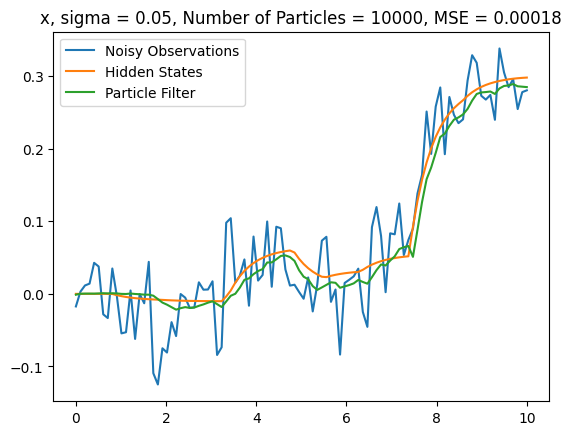

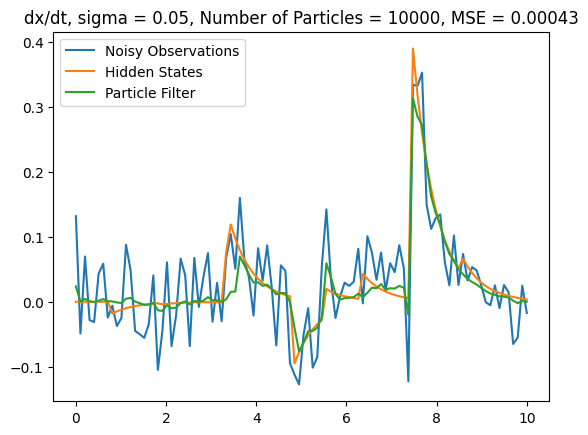

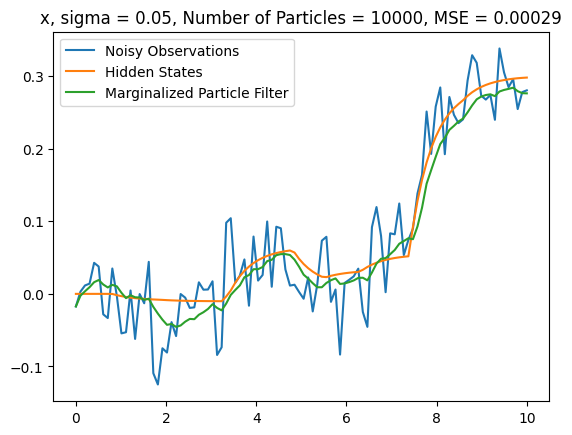

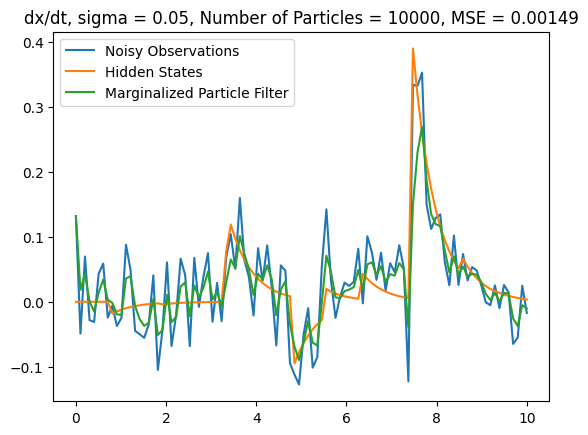

In [24]:
import numpy as np
from scipy.linalg import expm #This is the automatic matrix expnent solver
from jump_process_generators import *
import matplotlib.pyplot as plt
from NVM_state_space import *
from NVM_state_space_filters import *
from basic_tools import *
#Again, we first generate the noisy observations.
#We again have the noisy data first:
#Again, we first generate the noisy observations.
#We again have the noisy data first:
sigma_n = 0.05#The observation noise std. Note that only this term affects the noise level, not sigma_w


#Simulation Parameters
theta = -2 #The main control parameter for the Lagevin system
beta = 5
C = 0.1
T = 10
muw = 0
sigmaw = 1
N = 100  # Resolution

#Define the Langevin dynamics
A = np.zeros((2, 2))
A[0, 1] = 1
A[1, 1] = theta
h = np.array([[0], [1]])

#Simulation
evaluation_points = np.linspace(0, T, N) #Note that this would be the time axis we work on.
normal_gamma_generator = normal_gamma_process(beta, C, T, muw, sigmaw)
langevin = SDE(A,h,T,normal_gamma_generator)
#We need the NVM_jumps and jump_times as the exact proposal
SDE_samples,system_jumps,NVM_jumps,subordinator_jumps,jump_times = langevin.generate_samples(evaluation_points,all_data=True)
d1,d2 = np.shape(SDE_samples)
Noisy_samples = SDE_samples + np.random.randn(d1,d2)*sigma_n

Gaussian_parameters_inferred = []

trajectory = []

num_particles = 10000

    
initial_particles = np.zeros((num_particles,2)) # Random initial particles

# Define initial weights (uniform)
initial_weights = np.ones(num_particles) / num_particles


# Time step size and sigma for the likelihood function
dt = evaluation_points[1] - evaluation_points[0]
matrix_exp = expm(A*dt)
sigma = sigma_n

# Running the particle filter
particles = initial_particles
histories = [particles]
weights = initial_weights
for i in range(len(evaluation_points)):
    t = evaluation_points[i]
    observation = Noisy_samples[i]
    particles, weights,particles_gaussian_parameters = particle_filtering_mpf(observation, particles, weights,
                                                     transition_function_mpf,
                                                     likelihood_function,matrix_exp, dt, sigma)
    m,S = compute_inferred_gaussian_parameters(particles_gaussian_parameters,weights)
    Gaussian_parameters_inferred.append([m,S])
    particles = particles.reshape(num_particles,2)
    histories.append(particles)
    trajectory.append(weighted_sum(particles,weights))
trajectory = np.array(trajectory)
    

plt.plot(evaluation_points,Noisy_samples[:,0],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,0],label = "Hidden States")
plt.plot(evaluation_points,trajectory.T[0],label = "Particle Filter")
plt.title("x, sigma = {}, Number of Particles = {}, MSE = {}".format(sigma_n,num_particles,calculate_mse(SDE_samples[:,0],trajectory.T[0])))
plt.legend()
plt.show()



plt.plot(evaluation_points,Noisy_samples[:,1],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,1],label = "Hidden States")
plt.plot(evaluation_points,trajectory.T[1],label = "Particle Filter")
plt.title("dx/dt, sigma = {}, Number of Particles = {}, MSE = {}".format(sigma_n,num_particles,calculate_mse(SDE_samples[:,1],trajectory.T[1])))
plt.legend()
plt.show()






################################################################################################################################################
#From here we can pack the code into a Kalman filtering function
#Then we perform Kalman filtering with exact proposal for system parameters, driving process jumps and jump times
#Note that the driving process jumps are the NVM jumps

#Here we define the default prior covariance matrix for Kalman filteirng. No need for prior mean? Use the first sample directly
X0 = Noisy_samples[0]
nx0 = np.shape(X0)[0] 
P0 = np.identity(nx0)

delta_t = evaluation_points[1] - evaluation_points[0]
f = expm(A * delta_t)#The same transition matrix throughout in our example
g = np.identity(nx0) #Direct observation throughout
R = g * sigma_n**2 #Samen observation noise throughout
first_time = True
inferred_Xs = []
inferred_covs = []
for t,evaluation_point in enumerate(evaluation_points):
    
    noise_mean,noise_cov = Gaussian_parameters_inferred[t]
    observation = Noisy_samples[t]
    observation = np.array(observation).reshape(nx0,1) 
    #Kalman Prediction Step
    if first_time:
        first_time = False
        s=0
        inferred_X=np.array(X0).reshape(nx0,1)
        inferred_cov=P0
    else:
        inferred_X = inferred_Xs[-1]
        inferred_cov = inferred_covs[-1]
       
        inferred_X,inferred_cov = Kalman_transit(inferred_X,inferred_cov,f,noise_cov,mw = noise_mean)
        inferred_X = inferred_X.reshape(nx0,1)
    #print(inferred_X)
    #print(np.shape(inferred_X))
    #Kalman Correction Step
    inferred_X,inferred_cov = Kalman_correct(inferred_X,inferred_cov,observation,g,R)
    inferred_Xs.append(inferred_X)
    inferred_covs.append(inferred_cov)
    s = evaluation_point
inferred_Xs = np.squeeze(inferred_Xs, axis=-1)   
#These are the returns
##########################################################################################################################################

        

plt.plot(evaluation_points,Noisy_samples[:,0],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,0],label = "Hidden States")
plt.plot(evaluation_points,inferred_Xs[:,0],label = "Marginalized Particle Filter")
plt.title("x, sigma = {}, Number of Particles = {}, MSE = {}".format(sigma_n,num_particles,calculate_mse(SDE_samples[:,0],inferred_Xs[:,0])))
plt.legend()
plt.show()

plt.plot(evaluation_points,Noisy_samples[:,1],label = "Noisy Observations")
plt.plot(evaluation_points,SDE_samples[:,1],label = "Hidden States")
plt.plot(evaluation_points,inferred_Xs[:,1],label = "Marginalized Particle Filter")
plt.title("dx/dt, sigma = {}, Number of Particles = {}, MSE = {}".format(sigma_n,num_particles,calculate_mse(SDE_samples[:,1],inferred_Xs[:,1])))
plt.legend()
plt.show()

#x = SDE_samples[:,0]
#x_dot = SDE_samples[:,1]






#Then on top of particle filter inference results, we implement the Kalman filter on the rest of the conditionally Gaussian system



